# D214 Capstone
# Modeling Inflation Adusted Recessionary Lumber Prices
# Great Recession
## Eric Yarger

# Import Packages

In [1]:
# Import Initial Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.tsa.stattools import adfuller
import statsmodels
import datetime
import platform
from pmdarima.arima import ndiffs
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
from scipy import signal
from pmdarima.arima import StepwiseContext
from pmdarima.arima import auto_arima
from pmdarima.model_selection import train_test_split

### Environment

In [2]:
# Windows 10, Anaconda, JupyterLab, JupyterNotebook
# Jupyter environment version
!jupyter --version

Selected Jupyter core packages...
IPython          : 7.31.1
ipykernel        : 6.15.2
ipywidgets       : not installed
jupyter_client   : 7.3.5
jupyter_core     : 4.10.0
jupyter_server   : 1.18.1
jupyterlab       : 3.4.4
nbclient         : 0.5.13
nbconvert        : 6.4.4
nbformat         : 5.5.0
notebook         : 6.4.12
qtconsole        : not installed
traitlets        : 5.1.1


In [3]:
# Python Version
print(platform.python_version())

3.7.13


In [4]:
#Load Medical Dataset 
df = pd.read_csv('C:/Users/ericy/Desktop/lumber_trading_days_adj.csv')

# Data Selection for Analysis

In [5]:
#------ Select Data Set for Recession
df = df[8332:9221]

In [6]:
df

,Date,Trading Days,2022_Value,Value
8332,2005-12-07,8333,461.6040,322.80
8333,2005-12-08,8334,463.0340,323.80
8334,2005-12-09,8335,459.0300,321.00
8335,2005-12-12,8336,467.6100,327.00
8336,2005-12-13,8337,463.0340,323.80
...,...,...,...,...
9216,2009-06-25,9217,255.3516,202.66
9217,2009-06-26,9218,268.0776,212.76
9218,2009-06-29,9219,263.3400,209.00
9219,2009-06-30,9220,261.6264,207.64


# D1: Exploratory Data Analysis

In [7]:
df = df[['Trading Days','2022_Value']]

In [8]:
df

,Trading Days,2022_Value
8332,8333,461.6040
8333,8334,463.0340
8334,8335,459.0300
8335,8336,467.6100
8336,8337,463.0340
...,...,...
9216,9217,255.3516
9217,9218,268.0776
9218,9219,263.3400
9219,9220,261.6264


# EDA

In [9]:
df.head()

,Trading Days,2022_Value
8332,8333,461.604
8333,8334,463.034
8334,8335,459.030
8335,8336,467.610
8336,8337,463.034


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 8332 to 9220
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Trading Days  889 non-null    int64  
 1   2022_Value    889 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 14.0 KB


In [11]:
df.shape

(889, 2)

In [12]:
df.describe()

,Trading Days,2022_Value
count,889.000000,889.000000
mean,8777.000000,336.714558
std,256.776492,76.399901
min,8333.000000,174.006000
25%,8555.000000,290.165000
50%,8777.000000,333.788000
75%,8999.000000,377.746000
max,9221.000000,534.750000


In [13]:
df.isnull().any()

Trading Days    False
2022_Value      False
dtype: bool

## Line Graph Visualization

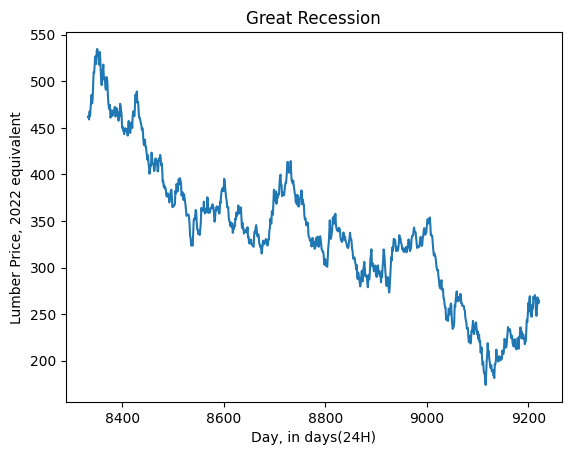

In [14]:
#-------
plt.plot(df['Trading Days'],df['2022_Value'])
plt.title('Great Recession')
plt.xlabel('Day, in days(24H)')
plt.ylabel('Lumber Price, 2022 equivalent')
plt.show()

# Data Cleaning

In [15]:
# Drop any null columns
df = df.dropna()

# D2: Time Step Formatting, Indexing



### Set df['Trading Days'] to Index

In [16]:
# Day to datetime
df['Trading Days'] = pd.to_datetime(df['Trading Days'], unit='D')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 8332 to 9220
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Trading Days  889 non-null    datetime64[ns]
 1   2022_Value    889 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.8 KB


In [18]:
# Set Day as Index
df.set_index('Trading Days',inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889 entries, 1992-10-25 to 1995-04-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2022_Value  889 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


# Date discrepency noted, per proposal delimitations
### Dataset is for Great Recession Period, December 2005 - July 2009

In [20]:
df

,2022_Value
Trading Days,
1992-10-25,461.6040
1992-10-26,463.0340
1992-10-27,459.0300
1992-10-28,467.6100
1992-10-29,463.0340
...,...
1995-03-28,255.3516
1995-03-29,268.0776
1995-03-30,263.3400


# D3 Stationarity Analysis
### Augmented Dickey Fuller (ADF) Test
### Assess stationarity of dataset

In [21]:
# Code Reference (Making time series stationary | Python, n.d.)
dicky_fuller_test = adfuller(df)

In [22]:
dicky_fuller_test

(-1.5523723714020112,
 0.5074629515436003,
 0,
 888,
 {'1%': -3.4377354773501243,
  '5%': -2.8648002689134535,
  '10%': -2.5685059946940183},
 5551.09052170876)

In [23]:
# Results show p = .50746
# Data does not reject null hypothesis at p < .05
# Therefore, Time series is determined to be non-stationary

# D4 Differencing
## 1st and 2nd order Differencing
### finding 'd' for ARIMA model

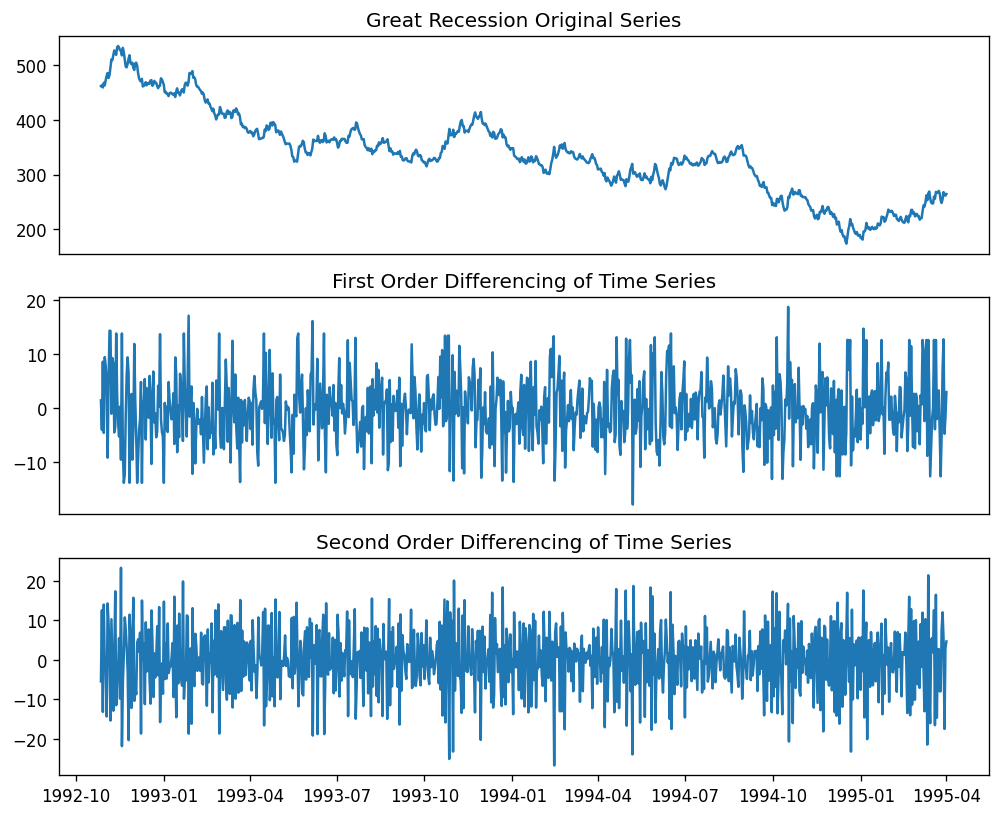

In [24]:
# Set plot parameters for multi-ax subplots
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':120})
 
# Establish that there are three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3)

# Plot the original dataset 
ax1.plot(df); ax1.set_title('Great Recession Original Series'); ax1.axes.xaxis.set_visible(False)

# First Order differencing of Time Series 
ax2.plot(df.diff()); ax2.set_title('First Order Differencing of Time Series'); ax2.axes.xaxis.set_visible(False)

# Second Order Differencing of Time Series
ax3.plot(df.diff().diff()); ax3.set_title('Second Order Differencing of Time Series')

# Plot all three graphs
plt.show()

In [25]:
# Using pmdarima's ndiffs to find differencing term
# Code reference (Verma, 2021)

kpss_diffs = ndiffs(df, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(df, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"Estimated differencing term: {n_diffs}")

Estimated differencing term: 1


# D5 Seasonality Analysis

In [26]:
# Code Reference (Boston, 2020)
result = seasonal_decompose(df)

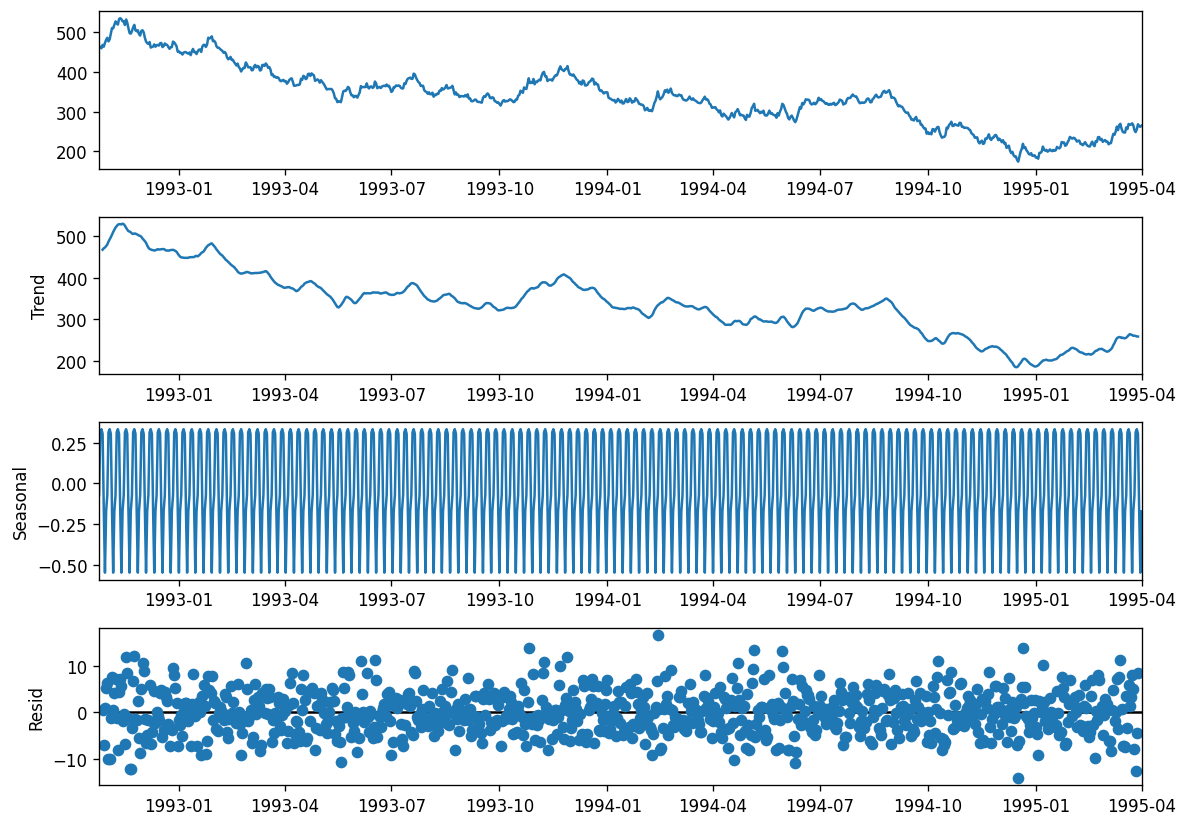

In [27]:
# plotting the result of our seasonal decomposition from the step above
rcParams['figure.figsize'] = 10,7
result.plot();

# D6 ACF and PACF

## Finding order of MA term 'q'
### Using Autocorrelation function (ACF)

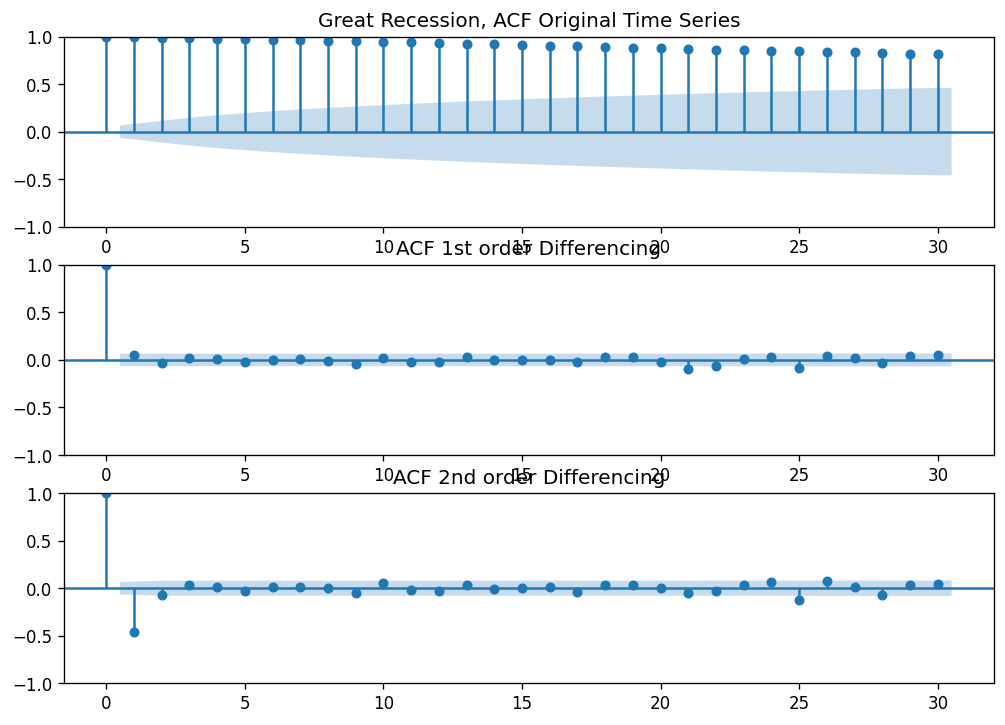

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df, ax=ax1, title='Great Recession, ACF Original Time Series');
plot_acf(df.diff().dropna(), ax=ax2, title='ACF 1st order Differencing');
plot_acf(df.diff().diff().dropna(), ax=ax3, title='ACF 2nd order Differencing');

## Finding order of AR term 'p'
### Using Partial autocorrelation (PACF)

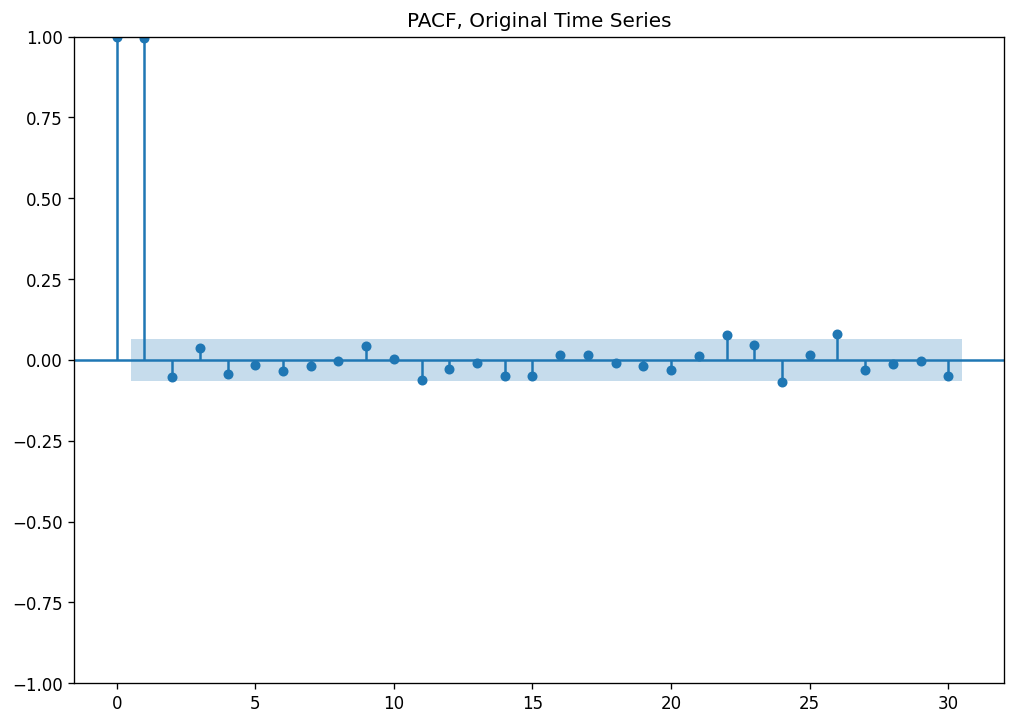

In [29]:
warnings.filterwarnings("ignore")
plot_pacf(df.dropna(), title='PACF, Original Time Series');

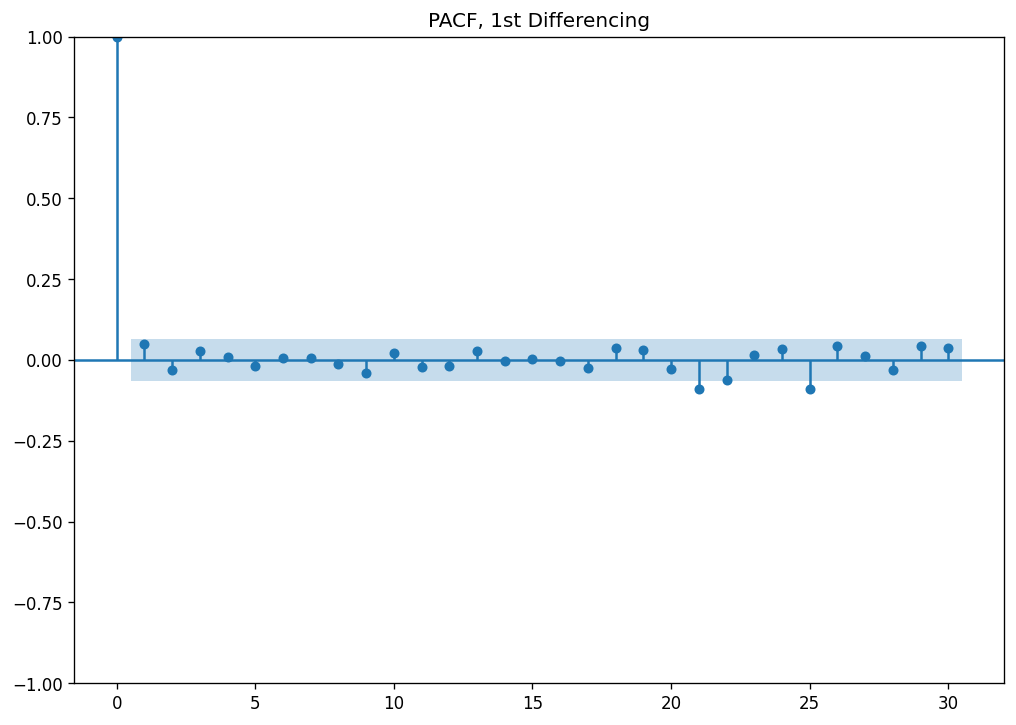

In [30]:
plot_pacf(df.diff().dropna(), title='PACF, 1st Differencing');

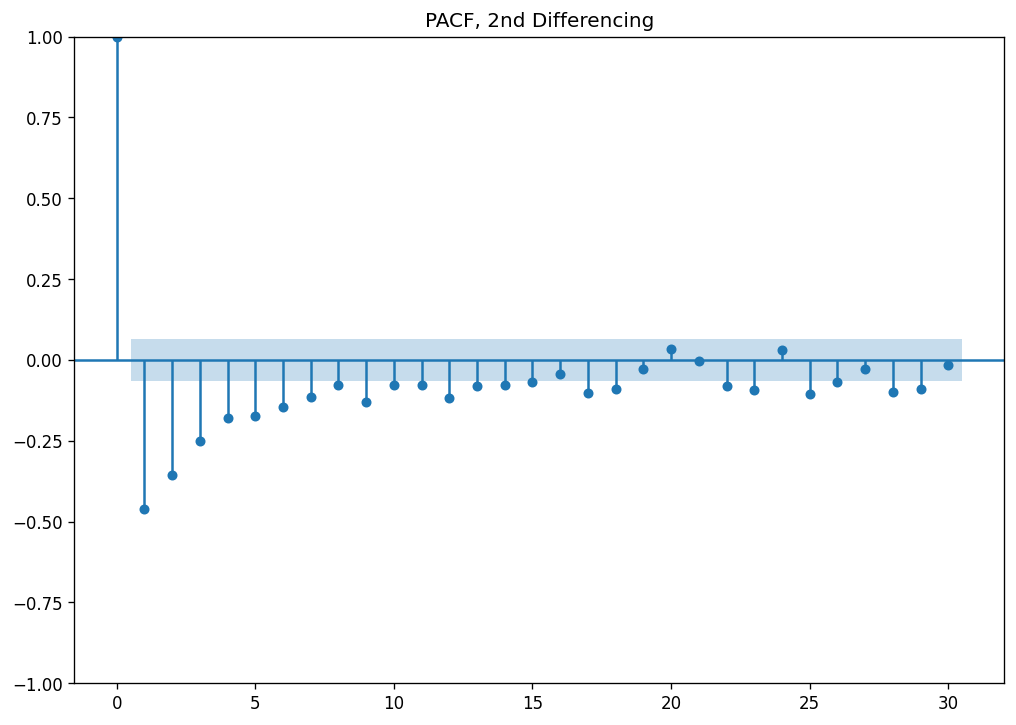

In [31]:
plot_pacf(df.diff().diff().dropna(), title='PACF, 2nd Differencing');

# D7 Spectral Density

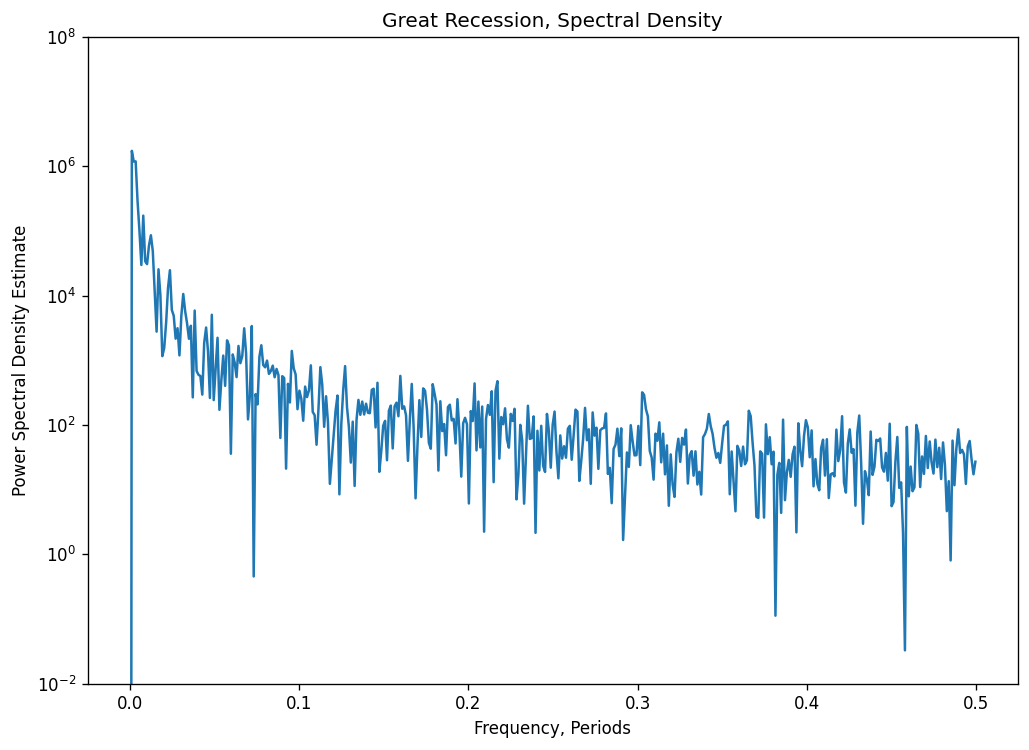

In [32]:
# Code Reference (Festus, 2022)

# signal periodogram
f, Pxx_den = signal.periodogram(df['2022_Value'])

# plotting semilogy - pyplot module used to make a plot with log scaling on the y-axis
plt.semilogy(f, Pxx_den)

# Setting coordinate values and titles for Spectral Density Graph
# setting y-axis min and max value
plt.ylim(1e-2, 1e8)

# Graph Title
plt.title('Great Recession, Spectral Density')

# X label for Periods
plt.xlabel('Frequency, Periods')

# Y Label for SD Estimate
plt.ylabel('Power Spectral Density Estimate')
plt.show()

# D8 Create Train/Test Datasets

## Dataset Size = 889 cases
## 80/20 Train/Test Split
## Split is 711 / 178

In [33]:
# ------Splitting data into Test and Train sets using pmdarima's train_test_split
# code reference (Smith, 2019)

train, test = train_test_split(df, train_size=711)

In [34]:
train

,2022_Value
Trading Days,
1992-10-25,461.604
1992-10-26,463.034
1992-10-27,459.030
1992-10-28,467.610
1992-10-29,463.034
...,...
1994-10-01,248.507
1994-10-02,243.529
1994-10-03,246.542


In [35]:
test

,2022_Value
Trading Days,
1994-10-06,255.4500
1994-10-07,249.5550
1994-10-08,255.8430
1994-10-09,260.6900
1994-10-10,261.3450
...,...
1995-03-28,255.3516
1995-03-29,268.0776
1995-03-30,263.3400


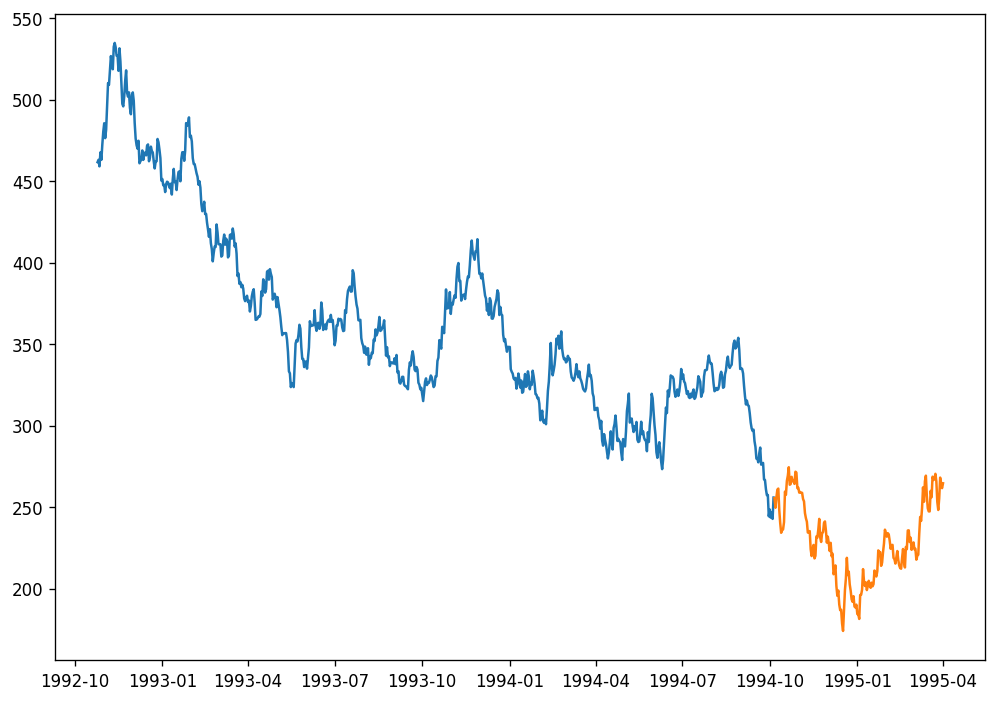

In [36]:
# Plot training data
plt.plot(train)

# Plot Test Data
plt.plot(test)

In [37]:
print(train.shape)
print(test.shape)

(711, 1)
(178, 1)


# D9 Auto-arima ARIMA Modeling
## Using pmdarima's auto_arima

In [38]:
# Fit the model using auto_arima
# Auto-arima code reference (6. Tips to using auto_arima — pmdarima 2.0.1 documentation, n.d.)
# Additional code reference (Pmdarima.arima.AutoARIMA — pmdarima 2.0.1 documentation, n.d.)
# Auto-arima, initial parameter attempt
# Code Reference (Kosaka, 2021)

# Establish auto_arima to run ARIMA and take into account
# Any Seasonality of the data, and any trends found.
model = auto_arima(train, start_p=1, start_q=1,
                   test='adf',
                   max_p=3,
                   max_q=3,
                   max_d=3,
                   seasonal=True,
                   stationarity=False,
                   seasonal_test='ocsb',
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True,
                  trend='c')

# Print Summary of Best AIC Minimized SARIMAX Model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4543.291, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4541.772, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4541.591, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4541.481, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4541.772, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4543.176, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4545.170, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4541.481, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.891 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  711
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2267.741
Date:                Tue, 18 Oct 2022   AIC                           4541.481
Time:                        13:09:4

In [68]:
model = auto_arima(train, trace=True)

# Print Summary of Best AIC Minimized SARIMAX Model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4541.772, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4541.591, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4541.481, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4541.477, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4543.291, Time=0.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.318 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  711
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2269.738
Date:                Tue, 18 Oct 2022   AIC                           4541.477
Time:                        21:11:01   BIC                           4546.042
Sample:                    10-25-1992   HQIC                          4543.240
               

In [40]:
model.conf_int()

,0,1
sigma2,31.418285,38.609899


# Plotting Model Results

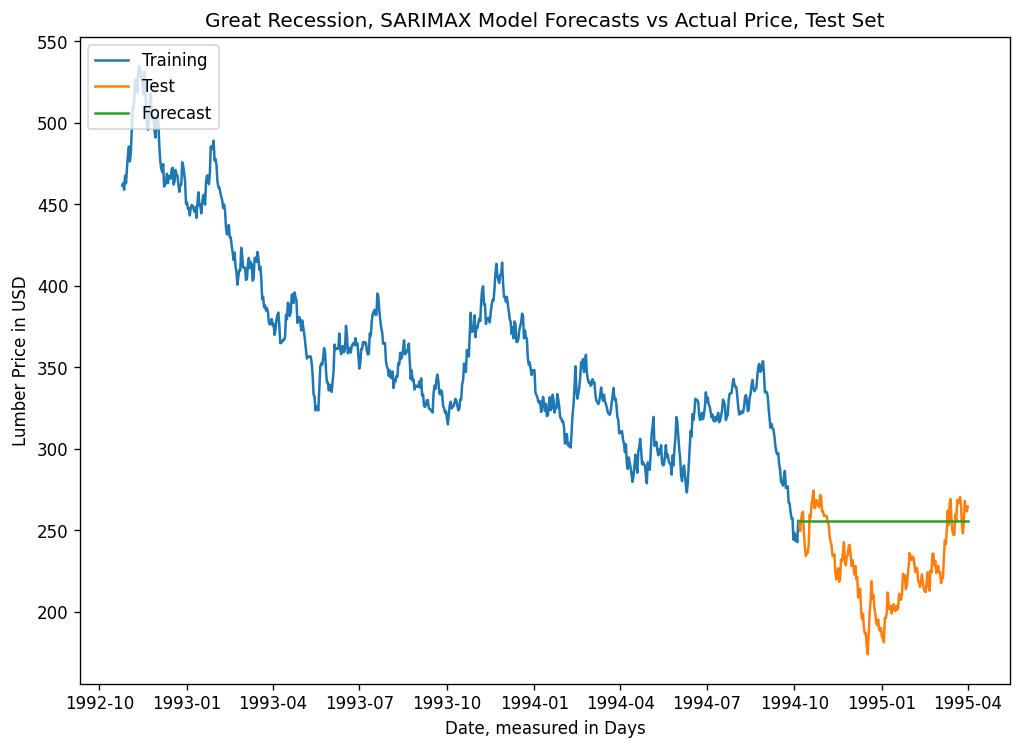

In [41]:
# Prediction assignment, predicted revenue column named
# Training, Test, and Predicted data plotted together
# Code Reference (Matplotlib.pyplot.plot — Matplotlib 3.6.0 documentation, n.d.)

# ------Creating varible with forecast values
forecast = pd.DataFrame(model.predict(n_periods = 178))

# Naming forecast_revenue column in forecast variable
forecast.columns = ['forecast_prices']

# Establish plot parameters for Forecast

# Plot figure size
plt.figure(figsize=(10,7))

# Training data
plt.plot(train,label="Training")

# Annotate X-axis label
plt.xlabel('Date, measured in Days')

# Annotate Y-axis label
plt.ylabel('Lumber Price in USD')

# Annotate Plot Title
plt.title('Great Recession, SARIMAX Model Forecasts vs Actual Price, Test Set')

# Plot Test Data
plt.plot(test,label="Test")

# Plot Forecast Data
plt.plot(forecast,label="Forecast")

# Plot legend in upper lefthand corner
plt.legend(loc = 'upper left')

# Show Plot
plt.show()

In [42]:
forecast

,forecast_prices
1994-10-06,255.843
1994-10-07,255.843
1994-10-08,255.843
1994-10-09,255.843
1994-10-10,255.843
...,...
1995-03-28,255.843
1995-03-29,255.843
1995-03-30,255.843
1995-03-31,255.843


# D10 Accuracy Metrics for our forecast

In [43]:
# RMSE and MAE to test model accuracy

In [44]:
# Create array of actual Revenue values, stored in Test variable

test_array = test[['2022_Value']].to_numpy()
#test_array

In [45]:
test_array.shape

(178, 1)

In [47]:
# Predictions to numpy array
predicted_array = forecast[['forecast_prices']].to_numpy()

In [48]:
predicted_array.shape

(178, 1)

In [49]:
#RMSE Calculation

rmse = sqrt(mean_squared_error(test_array, predicted_array))
print ('RMSE = ' + str(rmse))

RMSE = 36.00079057140054


In [50]:
# MAE Calculation

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

true = test_array
predicted = predicted_array

print(mae(true, predicted))

29.834739325842687


# D11 Visualizing Model Forecast Confidence Intervals at 20% CI

In [51]:
# Model Standard Error calculations, computed numerical Hessian

std_error = model.bse()
print(std_error)

sigma2    1.834629
dtype: float64


In [52]:
# Generate Model confidence intervals

conf_int = model.conf_int()

In [53]:
# ------Generate Forecast Prediction Intervals at 90% Confidence

y_forec, conf_int = model.predict(178, return_conf_int=True, alpha=0.8)
print(conf_int)

[[254.34387662 257.34212338]
 [253.72291939 257.96308061]
 [253.24644214 258.43955786]
 [252.84475324 258.84124676]
 [252.49085822 259.19514178]
 [252.17091266 259.51508734]
 [251.87669236 259.80930764]
 [251.60283877 260.08316123]
 [251.34562986 260.34037014]
 [251.10235563 260.58364437]
 [250.87097024 260.81502976]
 [250.64988428 261.03611572]
 [250.43783379 261.24816621]
 [250.23379394 261.45220606]
 [250.03692012 261.64907988]
 [249.84650649 261.83949351]
 [249.66195596 262.02404404]
 [249.48275816 262.20324184]
 [249.30847269 262.37752731]
 [249.13871644 262.54728356]
 [248.97315364 262.71284636]
 [248.81148808 262.87451192]
 [248.65345684 263.03254316]
 [248.49882532 263.18717468]
 [248.34738311 263.33861689]
 [248.19894064 263.48705936]
 [248.05332642 263.63267358]
 [247.91038471 263.77561529]
 [247.76997354 263.91602646]
 [247.63196309 264.05403691]
 [247.49623428 264.18976572]
 [247.36267755 264.32332245]
 [247.23119184 264.45480816]
 [247.10168369 264.58431631]
 [246.97406649

In [54]:
# Assign Predictions to pandas DataFrame

conf_pd = pd.DataFrame(conf_int, columns =['Low_Prediction','High_Prediction'])

#Assign Low predictions to variable
low_prediction = conf_pd['Low_Prediction']

#Assign High predictions to variable
high_prediction = conf_pd['High_Prediction']

In [55]:
# Read out Test and Train sets to csv file
# Open csv files in Google Sheets, Add Day Column
# Dates align with 'test' variable, which contains actual revenue figures

low_prediction.to_csv('C:/Users/ericy/Desktop/Low_Prediction.csv')
high_prediction.to_csv('C:/Users/ericy/Desktop/High_Prediction.csv')

In [56]:
#-----Load predictions, date column added

low_pred = pd.read_csv('C:/Users/ericy/Desktop/Gr_Rec_Low_Prediction.csv')
high_pred = pd.read_csv('C:/Users/ericy/Desktop/Gr_Rec_High_Prediction.csv')

In [57]:
# Variable exploration to ensure compatability with 'test' datetime timeframe
low_pred

,Date,Low_Prediction
0,1994-10-06,254.343877
1,1994-10-07,253.722919
2,1994-10-08,253.246442
3,1994-10-09,252.844753
4,1994-10-10,252.490858
...,...,...
173,1995-03-28,236.068205
174,1995-03-29,236.011462
175,1995-03-30,235.954881
176,1995-03-31,235.898461


In [58]:
# Variable exploration to ensure compatability with 'test' datetime timeframe
high_pred

,Date,High_Prediction
0,1994-10-06,257.342123
1,1994-10-07,257.963081
2,1994-10-08,258.439558
3,1994-10-09,258.841247
4,1994-10-10,259.195142
...,...,...
173,1995-03-28,275.617795
174,1995-03-29,275.674538
175,1995-03-30,275.731119
176,1995-03-31,275.787539


## Convert Low and High Prediction 'Day' column to datetime and index

In [59]:
# Lower Predictions, Set Day as Index
low_pred['Date'] = pd.to_datetime(low_pred['Date'])

In [60]:
low_pred.set_index('Date',inplace=True)

In [61]:
# High Predictions, Day to datetime
high_pred['Date'] = pd.to_datetime(high_pred['Date'])

In [62]:
# High Predictions, Set Day as Index
high_pred.set_index('Date',inplace=True)

In [63]:
low_pred

,Low_Prediction
Date,
1994-10-06,254.343877
1994-10-07,253.722919
1994-10-08,253.246442
1994-10-09,252.844753
1994-10-10,252.490858
...,...
1995-03-28,236.068205
1995-03-29,236.011462
1995-03-30,235.954881


In [64]:
high_pred

,High_Prediction
Date,
1994-10-06,257.342123
1994-10-07,257.963081
1994-10-08,258.439558
1994-10-09,258.841247
1994-10-10,259.195142
...,...
1995-03-28,275.617795
1995-03-29,275.674538
1995-03-30,275.731119


# SARIMAX Model Forecast, With Confidence Interval = 20%, Vs Test Set

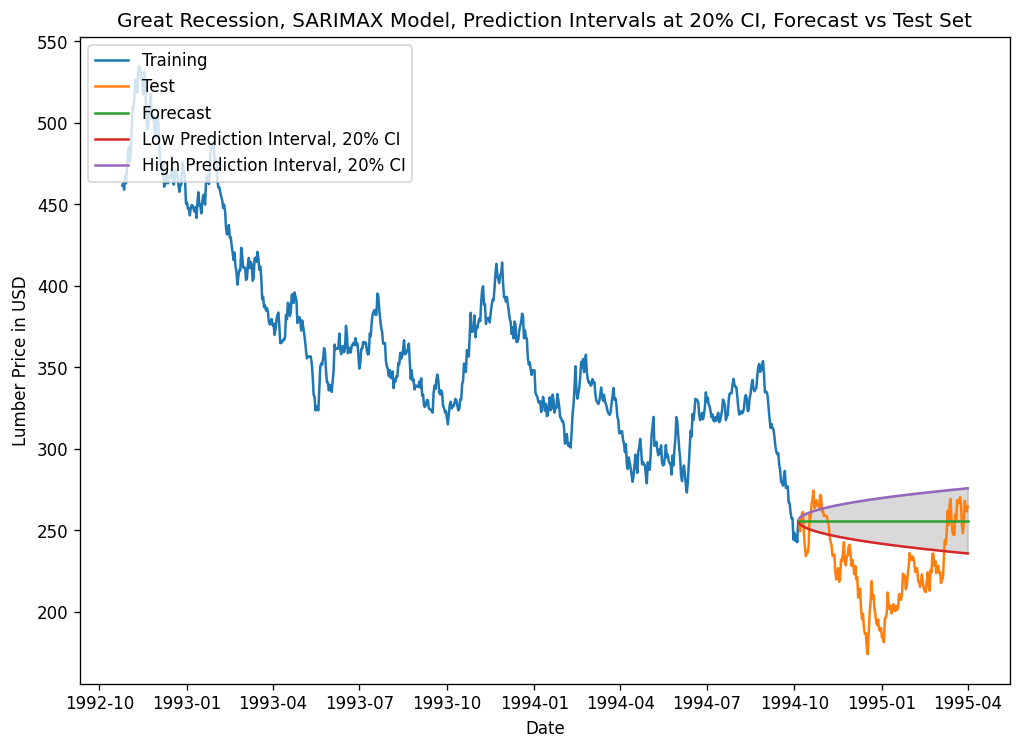

In [65]:
# Prediction assignment, predicted revenue column named
# Training, Test, and Predicted data plotted together
# Code Reference (Matplotlib.pyplot.plot — Matplotlib 3.6.0 documentation, n.d.)

# -----Creating varible with forecast values
forecast = pd.DataFrame(model.predict(n_periods = 178),index=test.index)

# Naming forecast_revenue column in forecast variable
forecast.columns = ['forecast_prices']

# Establish plot parameters for Forecast

# Plot figure size
plt.figure(figsize=(10,7))

# Training data
plt.plot(train,label="Training")

# Annotate X-axis label
plt.xlabel('Date')

# Annotate Y-axis label
plt.ylabel('Lumber Price in USD')

# Annotate Plot Title
plt.title('Great Recession, SARIMAX Model, Prediction Intervals at 20% CI, Forecast vs Test Set')

# Plot Test Data
plt.plot(test,label="Test")

# Plot Forecast Data
plt.plot(forecast,label="Forecast")

# Add Prediction Interval at 95% CI
plt.plot(low_pred,label='Low Prediction Interval, 20% CI')
plt.plot(high_pred,label='High Prediction Interval, 20% CI')
plt.fill_between(low_pred.index, low_pred['Low_Prediction'], high_pred['High_Prediction'], color='k', alpha=.15)

# Plot legend in upper lefthand corner
plt.legend(loc = 'upper left')


# Show Plot
plt.show()

# Is the null hypothesis Accepted or Rejected?

In [66]:
# Accept or reject the Null Hypothesis
# Great Recession we Accept the Null Hypothesis